<a href="https://colab.research.google.com/github/eichaui/PYTHON/blob/main/filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Download and unzip 
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Data manipulation and EDA
import pandas as pd
import numpy as np
from google.colab import files
import io

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
#%tensorflow_version 1.x
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
#from tensorflow.keras import backend as K
#from statsmodels.tsa.api import SimpleExpSmoothing
#from matplotlib.pylab import rcParams
#from statsmodels.tsa.stattools import adfuller
#import keras
#from keras.layers import Dense , Flatten,BatchNormalization
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.optimizers import Adam
#import itertools

Señales EMG sin filtrar

In [ ]:
df=pd.read_csv('UStotal.csv')
#f=pd.read_csv('/content/y.csv')
#df=df.drop(['TIME'],axis=1)
df.head(100)

,atencion,theta,low alfa,high alfa,low beta,high beta,low gamma,medd gamma
0,74,39285,4651,1085,5850,3587,1429,1370
1,74,34949,16162,13961,5697,3379,1751,759
2,74,23081,7966,5302,3427,1877,612,335
3,74,7426,6934,1103,1200,207,94,196
4,74,34466,3784,11545,63932,34442,7812,7649
...,...,...,...,...,...,...,...,...
95,37,12404,19845,26050,4071,7132,2218,1896
96,27,37268,6613,40543,3133,5199,1571,1571
97,34,44549,4137,32911,4867,3418,2026,2895
98,43,23828,8522,6166,2923,5195,2763,2422


In [ ]:
x1 = df.values
xv = x1.reshape(2555,8)
df1 = pd.DataFrame(xv)


Gráfica de señales

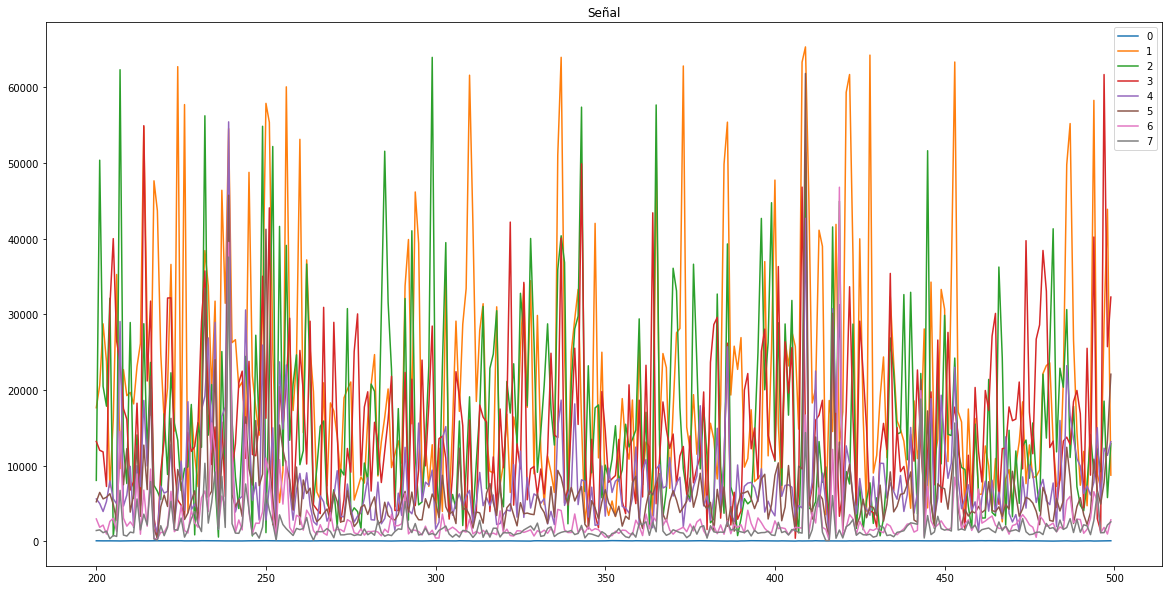

In [ ]:
df1[200:500].plot(figsize=(20,10))
#f[2000:4000].plot(figsize=(10,5))
plt.title('Señal')
plt.legend(loc='best')

Análisis de datos

In [ ]:
signal1=df['atencion']
signal2=df['theta']
signal3=df['low alfa']
signal4=df['high alfa']
signal5=df['low beta']
signal6=df['high beta']
signal7=df['low gamma']
signal8=df['medd gamma'] 
#df1=df.drop(['TIME','EMG2','EMG3'],axis=1)
#df2=df.drop(['TIME','EMG1','EMG3'],axis=1)
#df3=df.drop(['TIME','EMG1','EMG2'],axis=1)

df1=df.drop(['theta','low alfa','high alfa','low beta','high beta','low gamma','medd gamma'],axis=1) #atencion
df2=df.drop(['atencion','low alfa','high alfa','low beta','high beta','low gamma','medd gamma'],axis=1) #theta
df3=df.drop(['atencion','theta','high alfa','low beta','high beta','low gamma','medd gamma'],axis=1) #low alfa
df4=df.drop(['atencion','theta','low alfa','low beta','high beta','low gamma','medd gamma'],axis=1) # high alfa
df5=df.drop(['atencion','theta','low alfa','high alfa','high beta','low gamma','medd gamma'],axis=1)#low beta
df6=df.drop(['atencion','theta','low alfa','high alfa','low beta','low gamma','medd gamma'],axis=1)#high beta
df7=df.drop(['atencion','theta','low alfa','high alfa','low beta','high beta','medd gamma'],axis=1)#low gamma
df8=df.drop(['atencion','theta','low alfa','high alfa','low beta','high beta','low gamma'],axis=1)#high gamma

In [ ]:
df[:500].describe()

,atencion,theta,low alfa,high alfa,low beta,high beta,low gamma,medd gamma
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,57.612000,22189.418000,17263.020000,16356.268000,9722.908000,7874.770000,4360.380000,3139.660000
std,19.479434,14961.535317,14219.231758,12233.832109,10031.733469,8737.094305,7743.161765,6195.590715
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,44.000000,10649.750000,6464.750000,7248.250000,4015.750000,3551.000000,1271.000000,975.500000
50%,63.000000,18287.000000,12894.500000,13311.000000,6374.000000,5197.000000,1905.500000,1436.500000
75%,70.000000,30595.500000,24487.500000,22202.000000,10687.250000,8162.000000,3617.500000,2388.250000
max,97.000000,65322.000000,65268.000000,64745.000000,65296.000000,61814.000000,60119.000000,55582.000000


Grafica de columnas por sensor

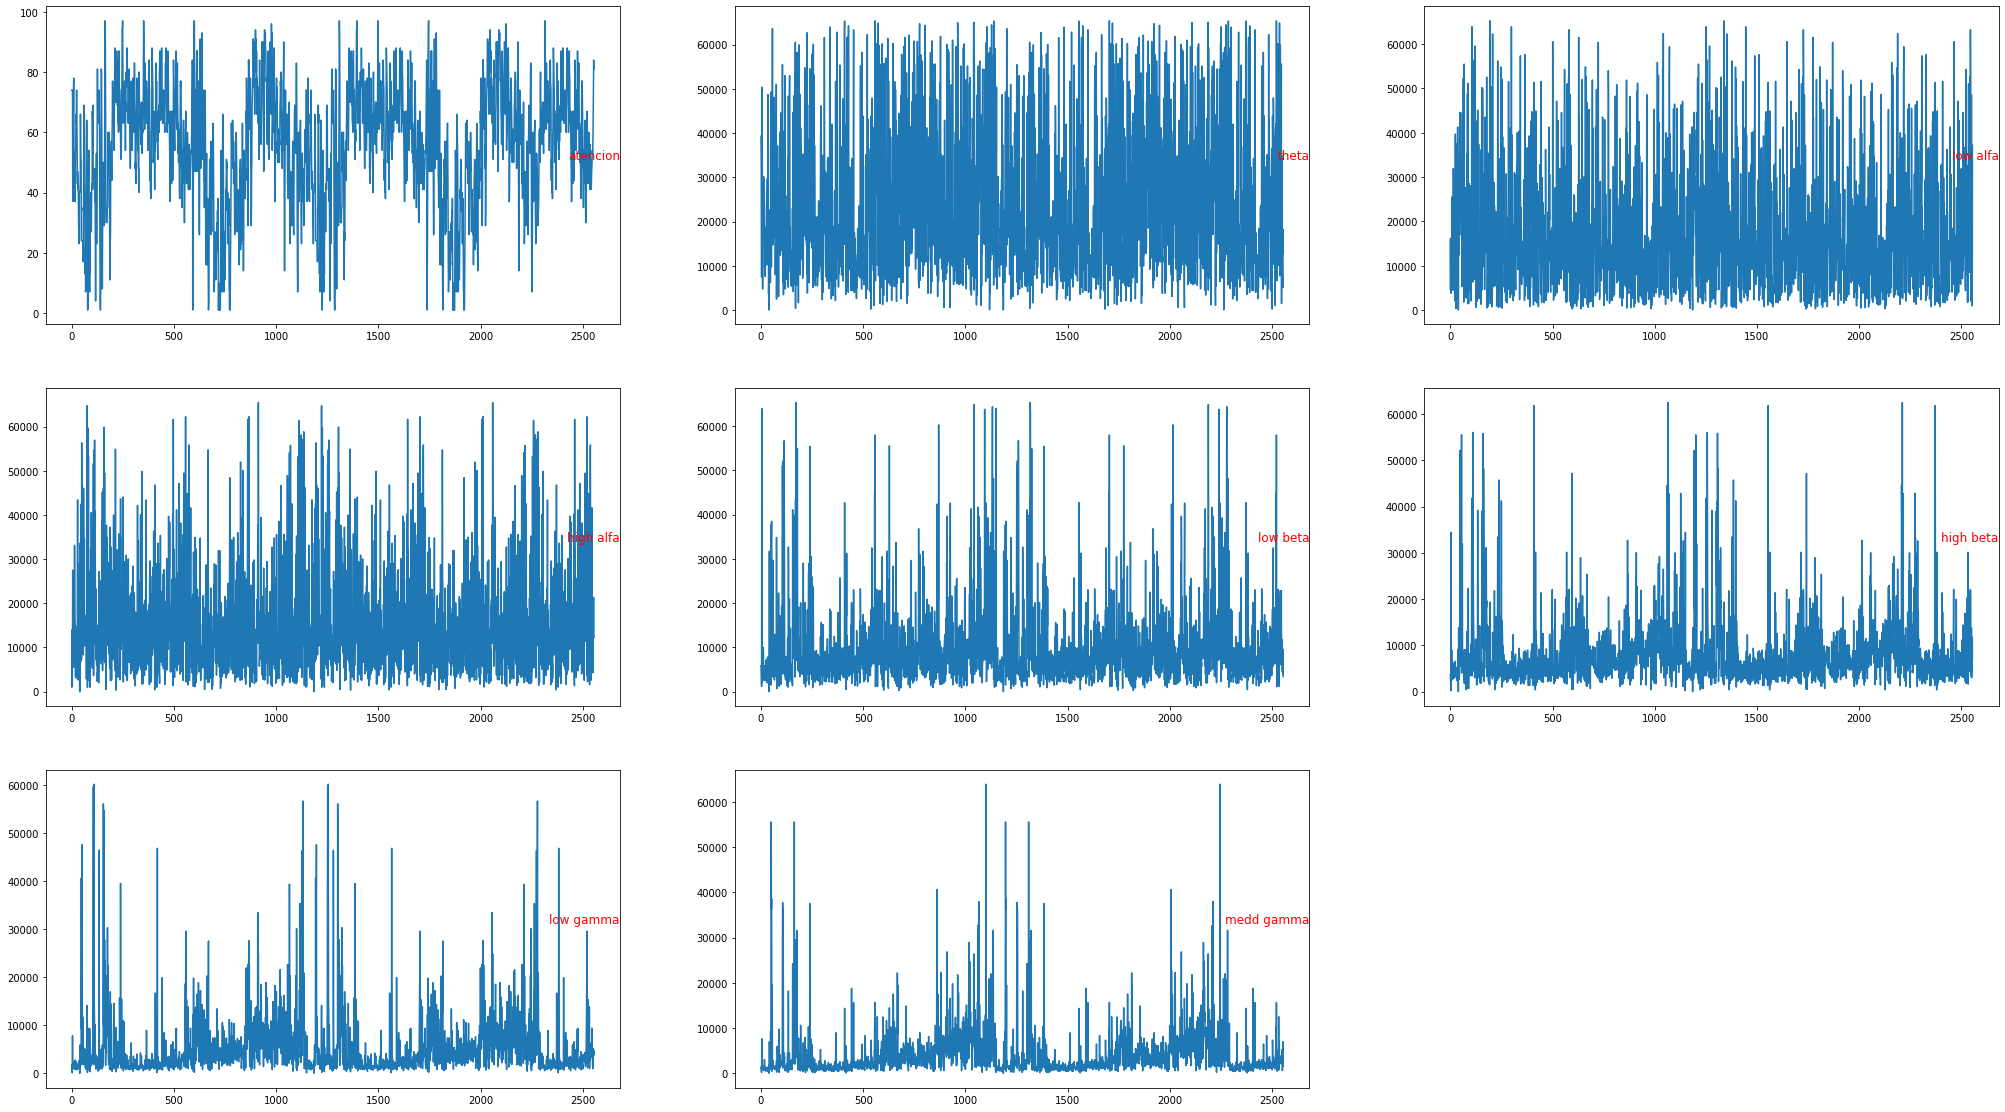

In [ ]:

groups = [0,1,2,3,4,5,6,7]
i = 1
# plot each column
plt.figure(figsize=(35,55))
for group in groups:
	plt.subplot(len(groups),3, i)
	plt.plot(df.values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right',color ='red')
	i += 1
plt.show()

Filtro - Suavizado exponencial

In [ ]:
from pandas.core.indexes.numeric import Float64Index
from pandas.core.arrays.datetimelike import round_nsint64
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

errores=[]
for i in np.arange(0,1.1,0.1):
  i=round(i,1)
  f1=SimpleExpSmoothing(signal1).fit(smoothing_level=i, optimized=False)
  r1=f1.fittedvalues
  df1['Pronostico alfa='+str(i)]=r1
  
  f2=SimpleExpSmoothing(signal2).fit(smoothing_level=i, optimized=False)
  r2=f2.fittedvalues
  df2['Pronostico alfa='+str(i)]=r2

  f3=SimpleExpSmoothing(signal3).fit(smoothing_level=i, optimized=False)
  r3=f3.fittedvalues
  df3['Pronostico alfa='+str(i)]=r3

  f4=SimpleExpSmoothing(signal4).fit(smoothing_level=i, optimized=False)
  r4=f4.fittedvalues
  df4['Pronostico alfa='+str(i)]=r4

  f5=SimpleExpSmoothing(signal5).fit(smoothing_level=i, optimized=False)
  r5=f5.fittedvalues
  df5['Pronostico alfa='+str(i)]=r5

  f6=SimpleExpSmoothing(signal6).fit(smoothing_level=i, optimized=False)
  r6=f6.fittedvalues
  df6['Pronostico alfa='+str(i)]=r6

  f7=SimpleExpSmoothing(signal7).fit(smoothing_level=i, optimized=False)
  r7=f7.fittedvalues
  df7['Pronostico alfa='+str(i)]=r7

  f8=SimpleExpSmoothing(signal8).fit(smoothing_level=i, optimized=False)
  r8=f8.fittedvalues
  df8['Pronostico alfa='+str(i)]=r8

  

  
  #df['Error alfa= '+str(i)]= df['TIME']-df['Pronostico alfa='+str(i)]
  #df['Error2 alfa= '+str(i)]= pow(df['Error alfa= '+str(i)],2)
  #suma=df['Error2 alfa= '+str(i)].sum()
  #df.plot(x='TIME',y='Pronostico alfa='+str(i),ax=ax)
  #errores.append(suma)

print(errores)

[]


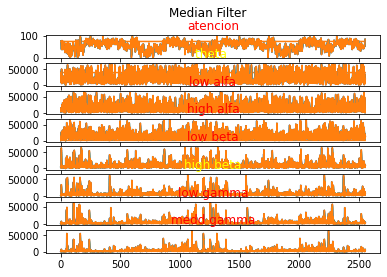

In [ ]:
f, plt_arr =plt.subplots(8,sharex=True)
f.suptitle('Median Filter')

plt_arr[0].plot(df1)
plt_arr[0].set_title("atencion", color ='red')

plt_arr[1].plot(df2)
plt_arr[1].set_title("theta ", color ='yellow')

plt_arr[2].plot(df3)
plt_arr[2].set_title("low alfa", color ='red')

plt_arr[3].plot(df4)
plt_arr[3].set_title("high alfa", color ='red')

plt_arr[4].plot(df5)
plt_arr[4].set_title("low beta", color ='red')

plt_arr[5].plot(df6)
plt_arr[5].set_title("high beta", color ='yellow')

plt_arr[6].plot(df7)
plt_arr[6].set_title("low gamma", color ='red')

plt_arr[7].plot(df8)
plt_arr[7].set_title("medd gamma", color ='red')




plt.show()

#df1.plot(figsize=(15,10))
#df2['Pronostico alfa=0.2'].plot(figsize=(15,10))
#df3.plot(figsize=(15,10))

Filtro - Media movil

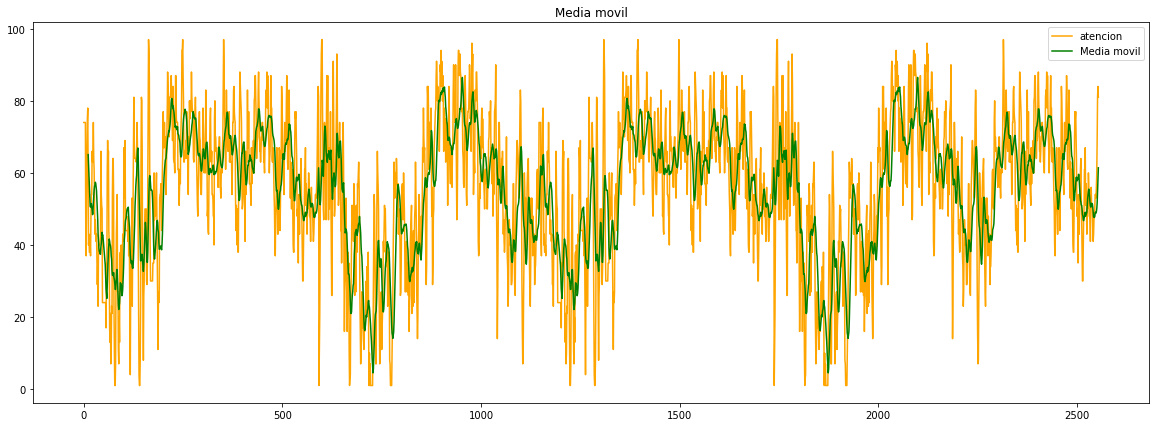

In [ ]:
moving_avg1 = pd.Series(signal1).rolling(window=12).mean()
moving_avg2 = pd.Series(signal2).rolling(window=12).mean()
moving_avg3 = pd.Series(signal3).rolling(window=12).mean()
moving_avg4 = pd.Series(signal4).rolling(window=12).mean()
moving_avg5 = pd.Series(signal5).rolling(window=12).mean()
moving_avg6= pd.Series(signal6).rolling(window=12).mean()
moving_avg7 = pd.Series(signal7).rolling(window=12).mean()
moving_avg8 = pd.Series(signal8).rolling(window=12).mean()


df1['atencion'].plot(figsize=(20,7),color='orange')
moving_avg1.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')


#df1['atencion'][:500].plot(figsize=(20,7),color='blue')
#moving_avg1[:500].plot(label='Media movil',color='red')
#plt.title('Filtro Media movil')
#plt.legend(loc='best')
#ylabel('mV')
#xlabel('t')

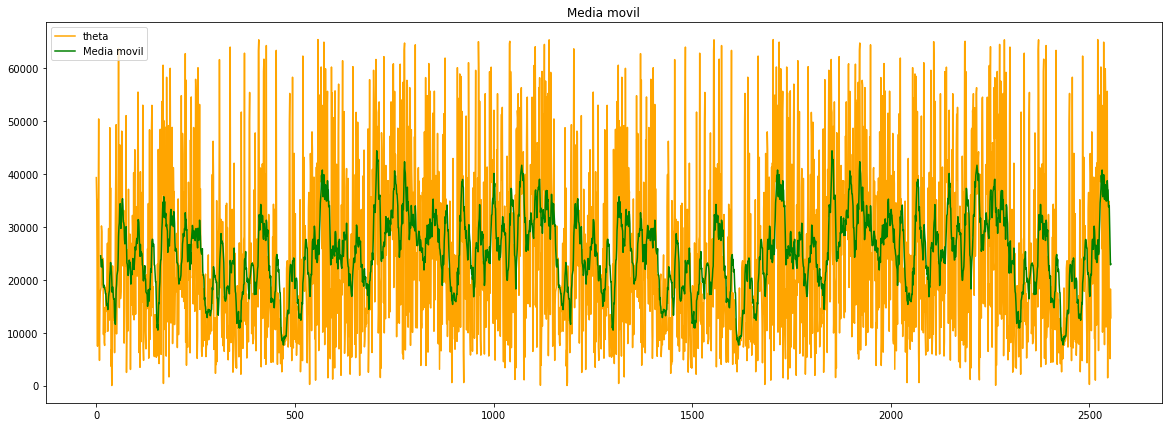

In [ ]:
df2['theta'].plot(figsize=(20,7),color='orange')
moving_avg2.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

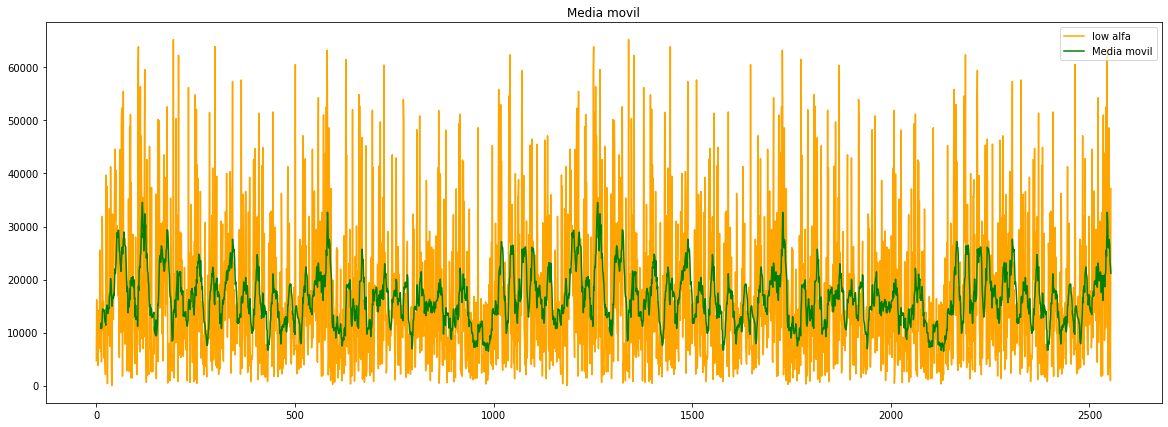

In [ ]:
df3['low alfa'].plot(figsize=(20,7),color='orange')
moving_avg3.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')


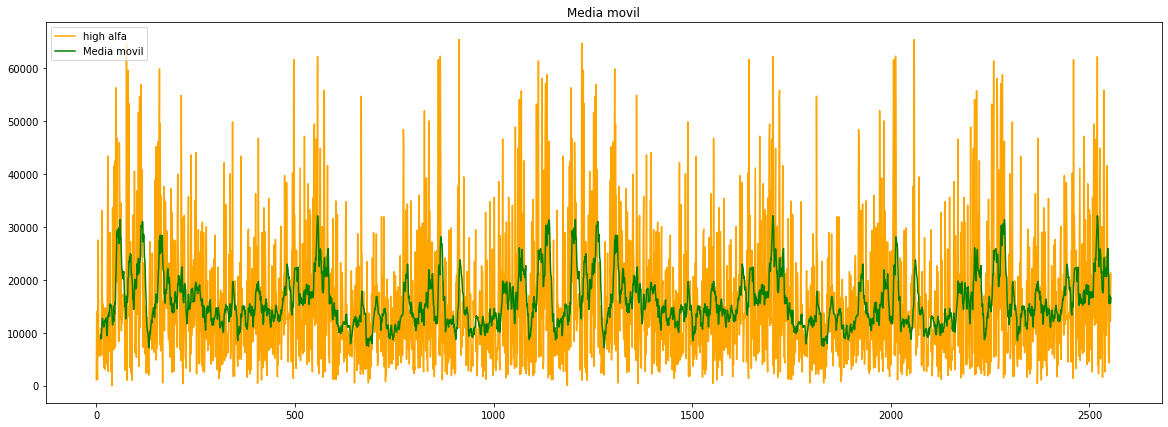

In [ ]:
#@title Texto de título predeterminado
variable_name = ""
df4['high alfa'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

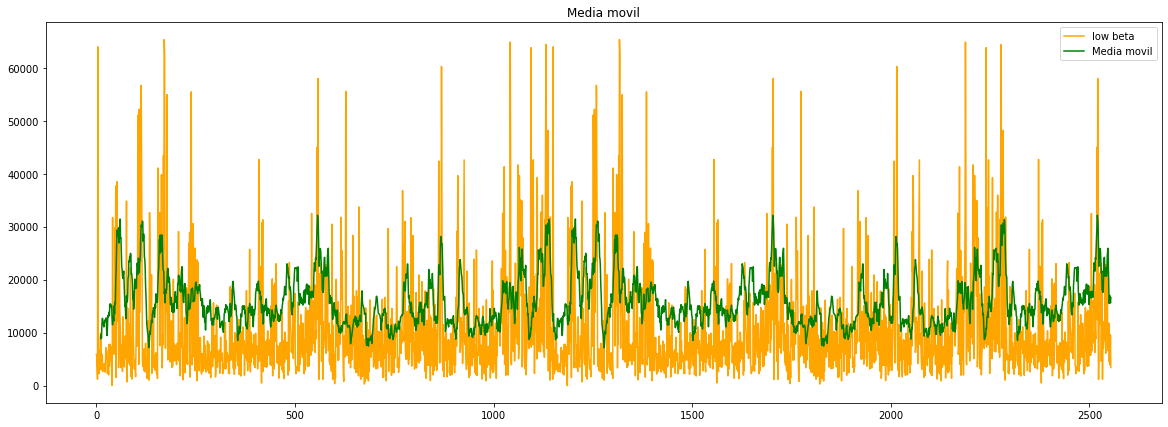

In [ ]:
#@title Texto de título predeterminado
variable_name = ""
df5['low beta'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

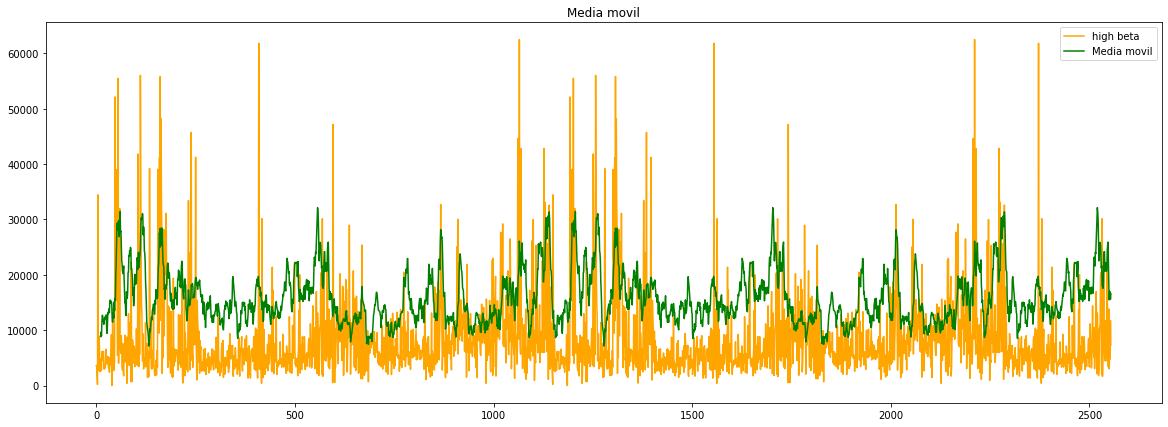

In [ ]:
#@title Texto de título predeterminado
variable_name = ""
df6['high beta'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

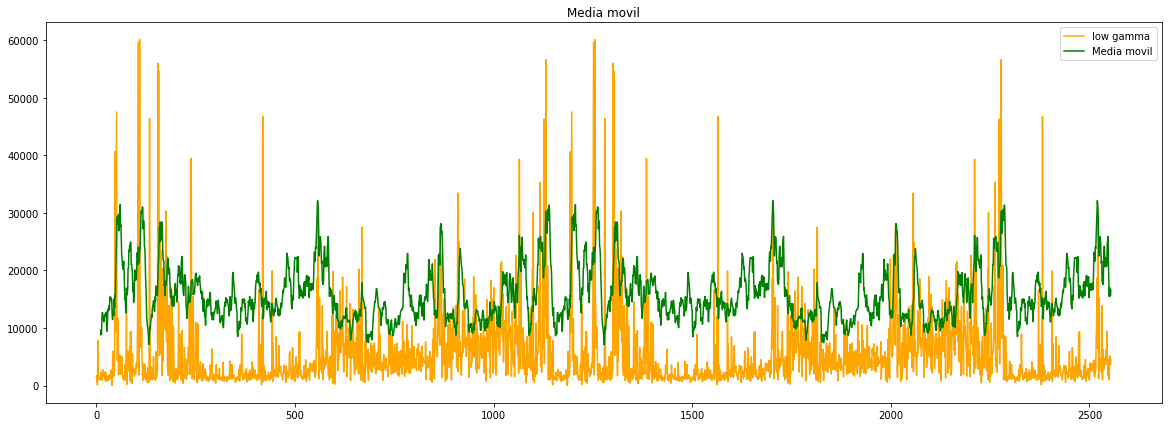

In [ ]:
#@title Texto de título predeterminado
variable_name = ""
df7['low gamma'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

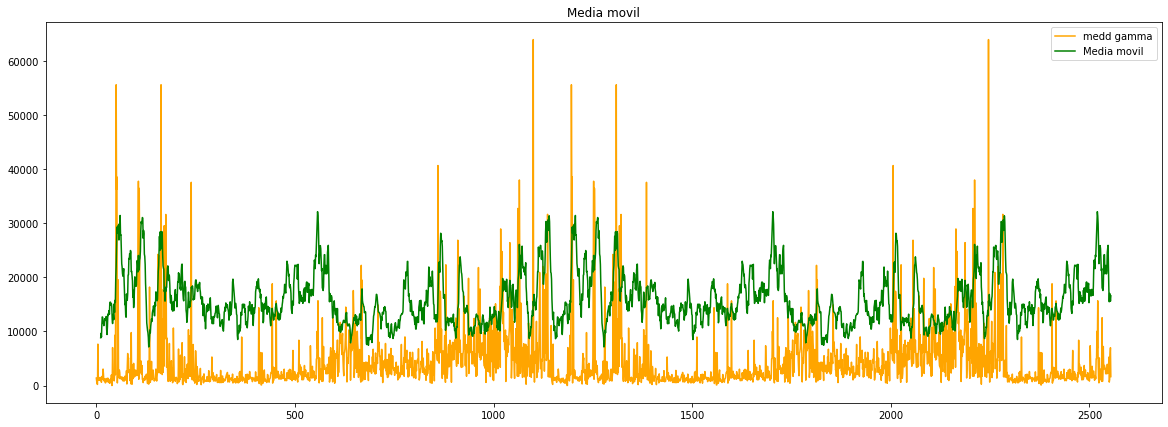

In [ ]:
#@title Texto de título predeterminado
variable_name = ""
df8['medd gamma'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

In [ ]:
df9=pd.DataFrame()
df9['delta']=moving_avg1
df9['theta']=moving_avg2
df9['low alp']=moving_avg3
df9['high alp']=moving_avg4
df5[30:50].head()
#Genera una matrix nueva
df9.to_csv('MediaMovil.csv')
df9.describe()

,delta,theta,low alp,high alp
count,2544.000000,2544.000000,2544.000000,2544.000000
mean,55.421089,25132.334480,16498.667977,15903.301756
std,15.696877,6933.598601,4983.245412,4779.211409
min,4.500000,7653.750000,6459.000000,7125.083333
25%,44.000000,20226.583333,12823.854167,12412.166667
50%,58.250000,25192.333333,16169.083333,14815.333333
75%,67.583333,30038.125000,19539.750000,18338.583333
max,86.500000,44350.916667,34550.166667,32124.500000


**Filtro - Savitzky golay**:



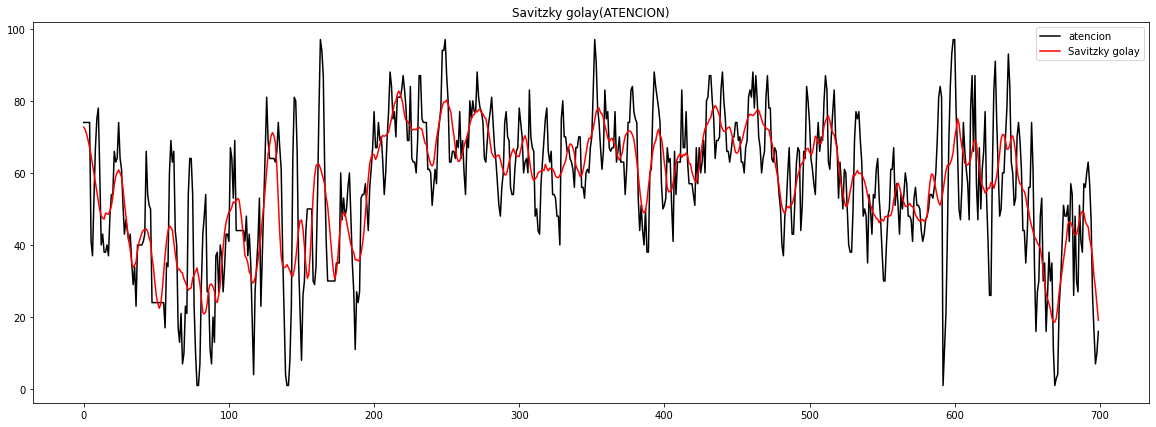

In [ ]:
#@title Texto de título predeterminado
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
#5,2
#51,3

SG1=savgol_filter(signal1, 21, 3)
df1['atencion']=SG1
SG2=savgol_filter(signal2, 21, 3)
df2['theta']=SG2
SG3=savgol_filter(signal3, 21, 3)
df3['low alfa']=SG3
SG4=savgol_filter(signal4, 21, 3)
df4['high alfa']=SG4
SG5=savgol_filter(signal5, 21, 3)
df5['low beta']=SG5
SG6=savgol_filter(signal6, 21, 3)
df6['high beta']=SG6
SG7=savgol_filter(signal7, 21, 3)
df7['low gamma']=SG7
SG8=savgol_filter(signal8, 21, 3)
df8['high alfa']=SG8

#df1['SG1'][:500].plot(figsize=(20,7),color='blue')
signal1[:700].plot(figsize=(20,7),label='atencion',color='black')
df1['atencion'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay(ATENCION)')
plt.legend(loc='best')
#moving_avg1



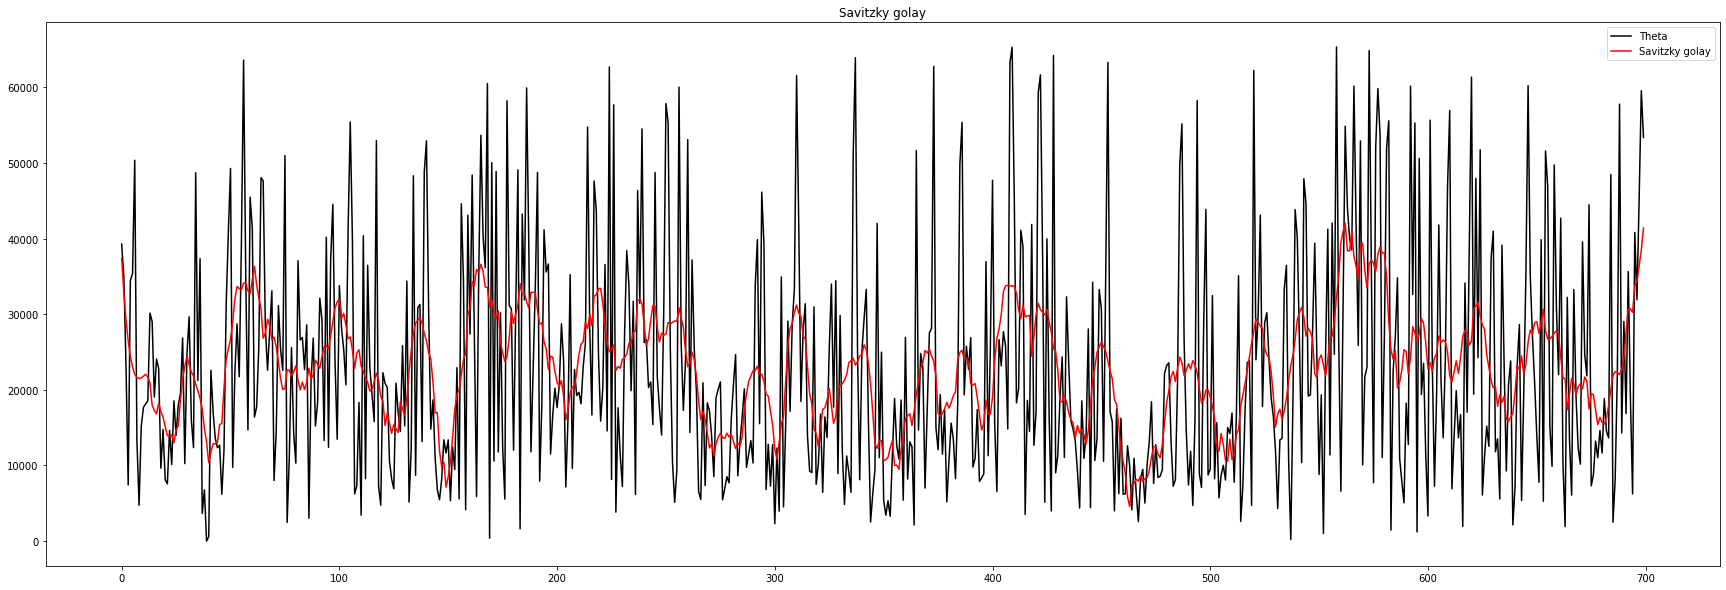

In [ ]:
variable_name = "theta"
#df2['SG2'].plot(figsize=(25,10),color='violet')
signal2[:700].plot(figsize=(30,10),label='Theta',color='black')
df2['theta'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')
#moving_avg2

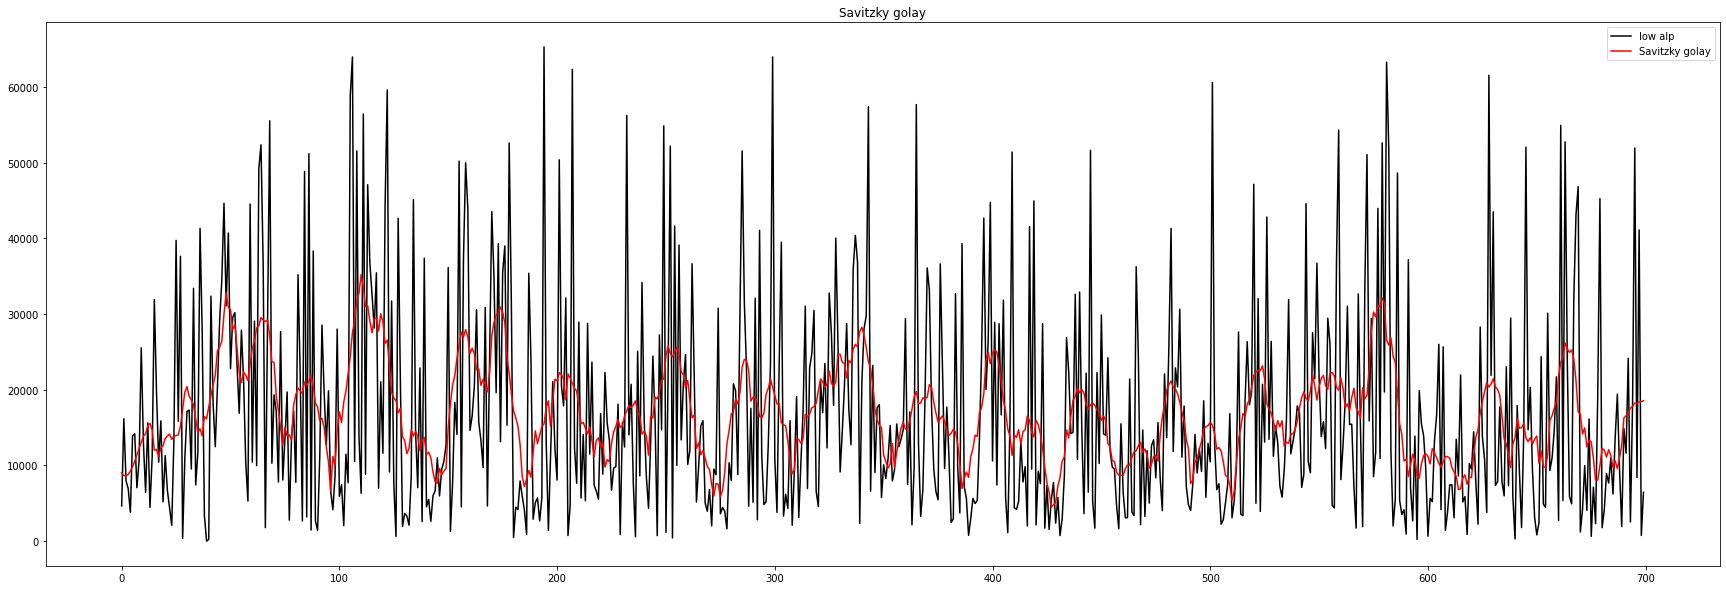

In [ ]:
#@title Texto de título predeterminado
variable_name = "low alfa"
#df3['SG3'][:500].plot(figsize=(25,10),color='violet')
signal3[:700].plot(figsize=(30,10),label='low alp',color='black')
df3['low alfa'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

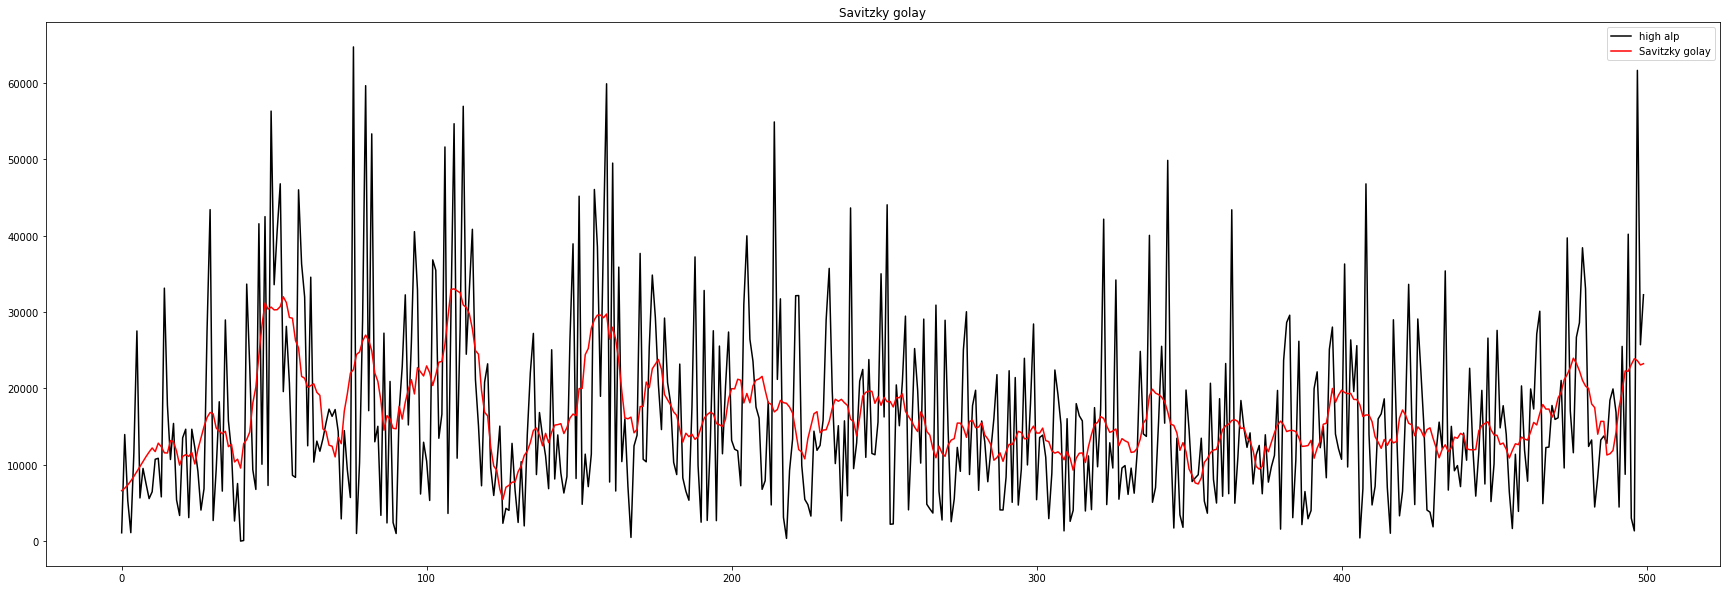

In [ ]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal4[:500].plot(figsize=(30,10),label='high alfa',color='black')
df4['high alfa'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

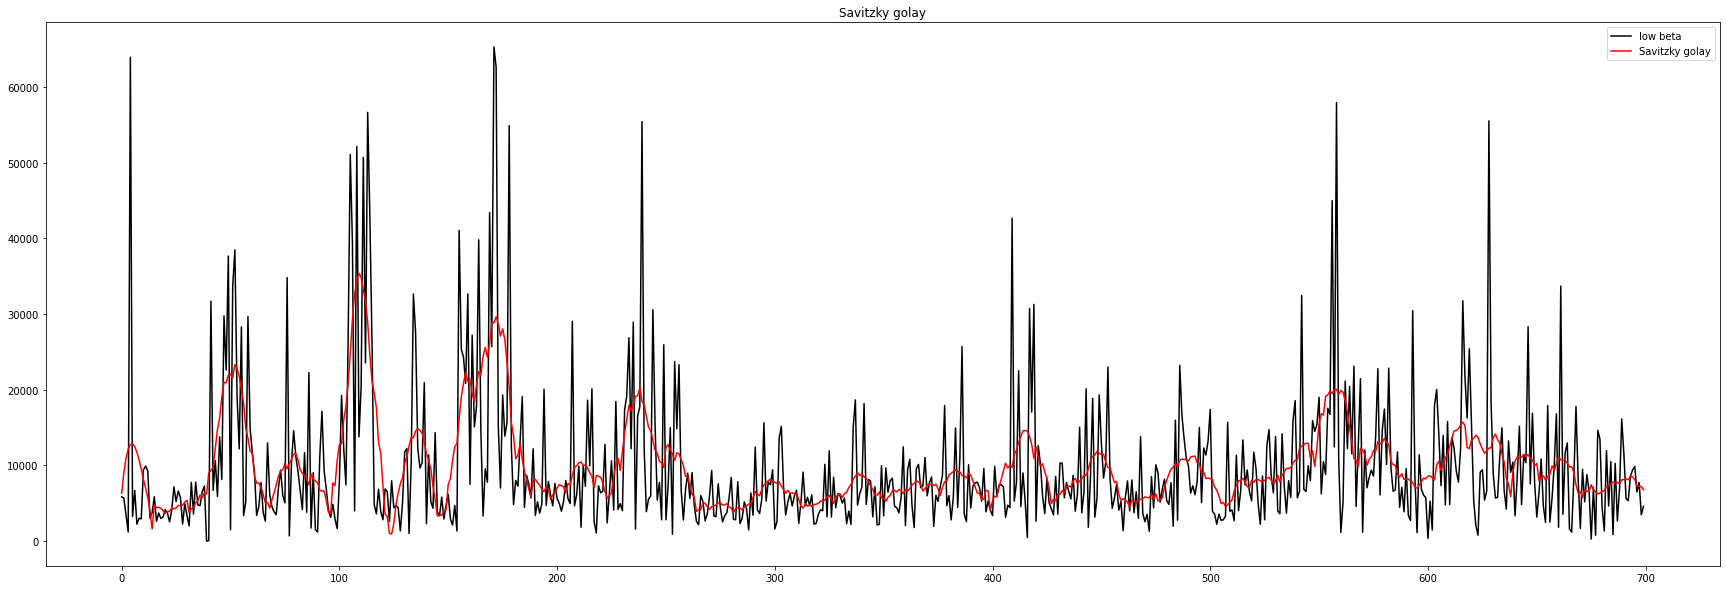

In [ ]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal5[:700].plot(figsize=(30,10),label='low beta',color='black')
df5['low beta'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

In [ ]:
#@title Texto de título predeterminado
df5=pd.DataFrame()
df5['delta']=SG1
df5['theta']=SG2
df5['low alp']=SG3
df5['high alp']=SG4
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('BDDFSG.csv')
df5.describe()

,delta,theta,low alp,high alp
count,280.000000,280.000000,280.000000,280.000000
mean,27607.756765,23553.467557,17865.979884,16767.278639
std,9313.688250,6832.580007,5764.361596,4703.223749
min,7453.169663,6823.375940,5832.326250,7855.654462
25%,20633.162144,18641.207257,13870.589653,13224.903155
50%,26531.307594,23276.550564,17611.518634,15862.701373
75%,34501.108205,28835.858042,21575.726463,20192.925629
max,49563.318078,41143.989866,35008.698921,30085.600850


Filtro FIR

ValueError: ignored

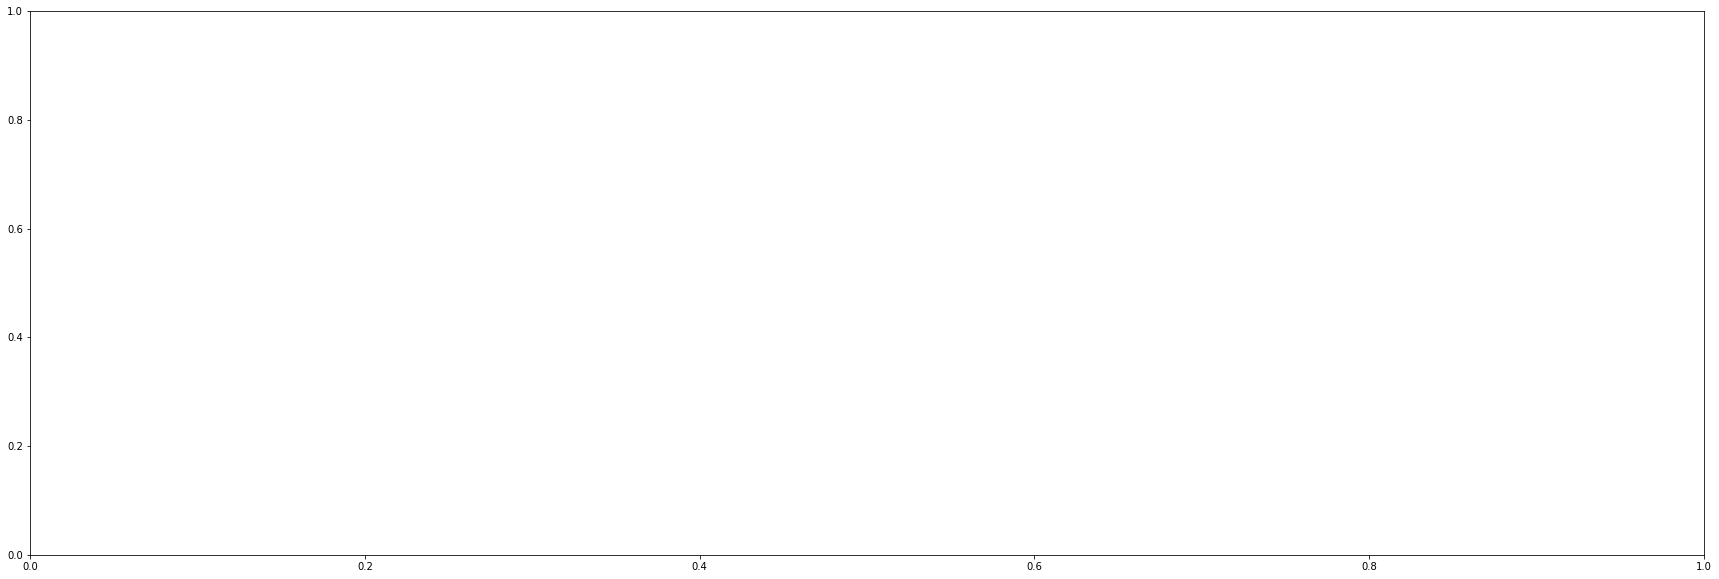

In [ ]:
from numpy import pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, xlabel, ylabel, title, show, get_figlabels
from pylab import *
import matplotlib
from matplotlib import pylab, mlab, pyplot

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal1)
df1['FIR1']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal1[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('delta', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()


ValueError: ignored

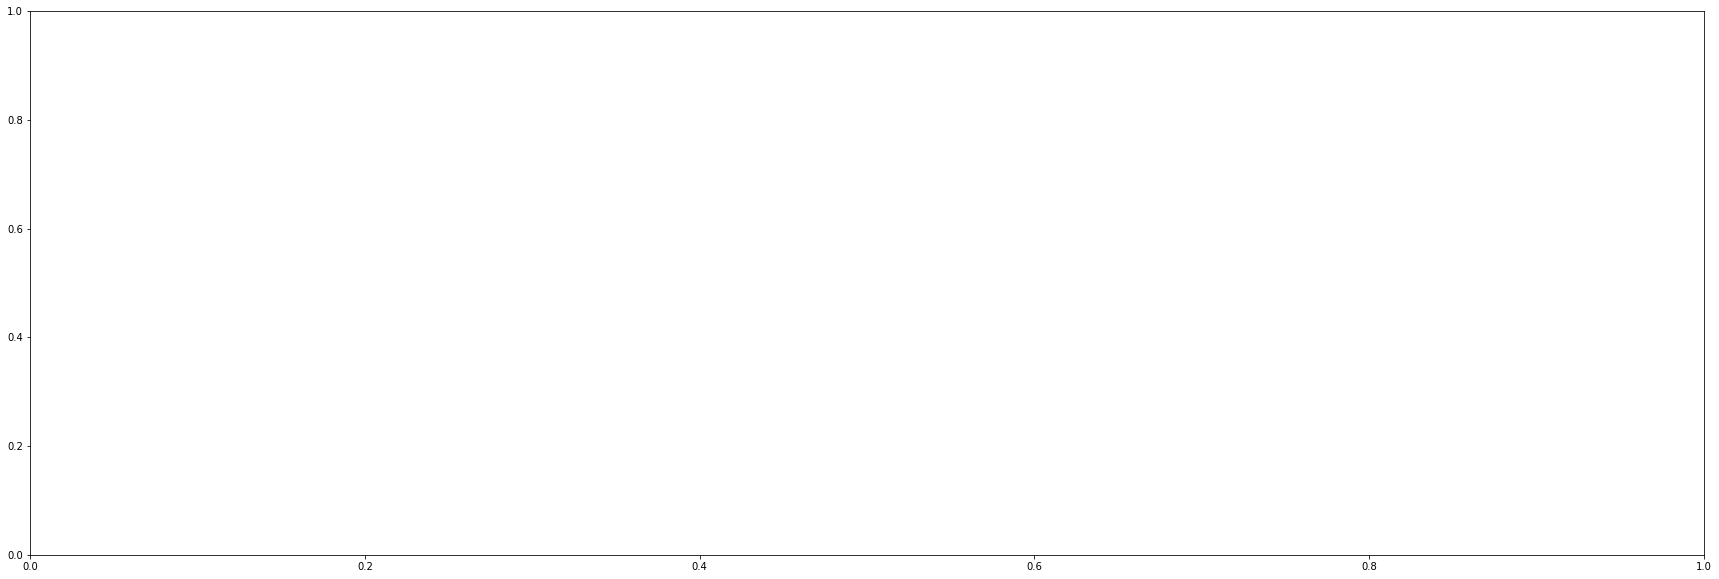

In [ ]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal2)
df2['FIR2']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal2[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Theta', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

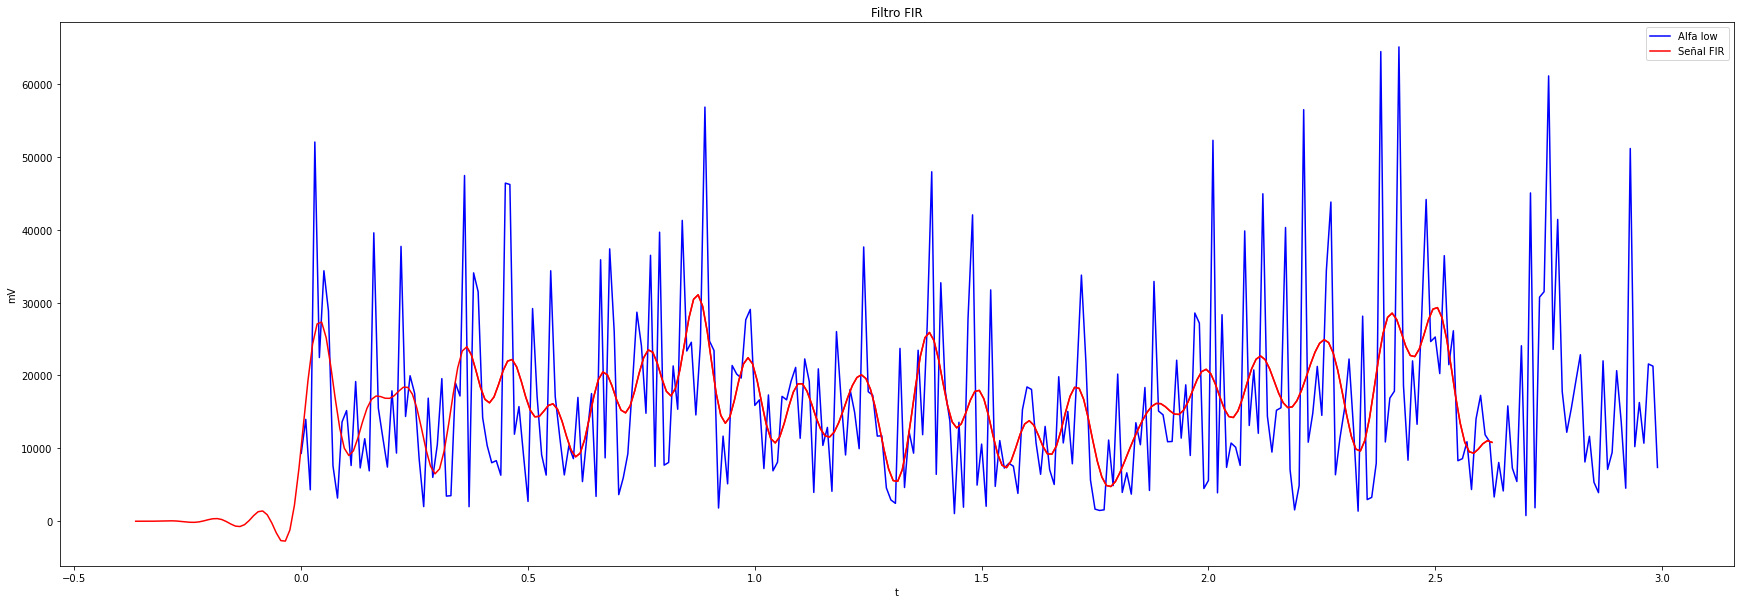

In [ ]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal3)
df3['FIR3']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal3[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Alfa low', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

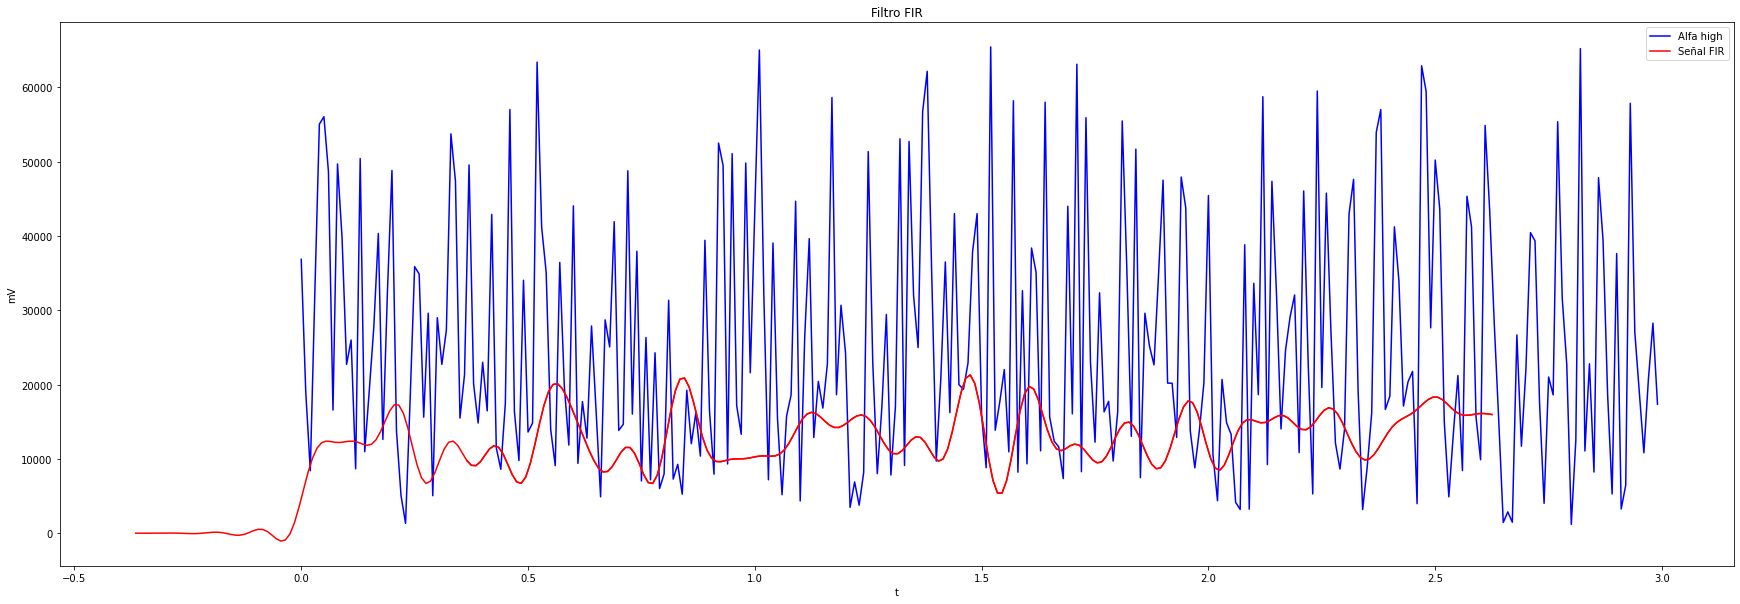

In [ ]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal4)
df4['FIR4']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal2[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Alfa high', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

In [ ]:
df11=pd.DataFrame()
df11['atencion']=df1['FIR1']
df11['theta']=df2['FIR2']
df11['Alfa low']=df3['FIR3']
df11['Alfa high']=df4['FIR4']
df11.describe()

KeyError: ignored